# Guia 7

## Ejercicio 1

Implemente un algoritmo de optimización por enjambre de partículas y utilicelo para encontrar el mínimo local de las funciones del Ejercicio 1 de la Guía de trabajos prácticos 6.
Compare los resultados en relación a los obtenidos con algoritmos genéticos en términos de las soluciones encontradas y la velocidad de convergencia.


- $f(x) = -xsin(\sqrt{|x|}$ con $x \in [-512...512]$

- $f(x,y) = (x^2+y^2)^{0.25} [sin^2(50(x^2+y^2)^{0.1})+1]$, con $x,y \in [-100...100]$

Convergencia alcanzada en iteración 22
f1 -> mejor x: [420.94141652] mejor y: -418.9827930244033


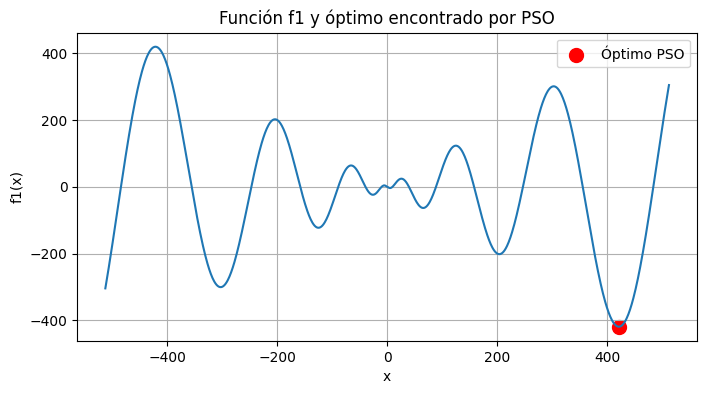

In [2]:
import numpy as np
from PSO import PSO
import matplotlib.pyplot as plt


def f1(x):
    x = np.atleast_1d(x)
    f = -x*np.sin(np.sqrt(np.abs(x)))
    return f if f.shape[0] > 1 else f[0]



pso1 = PSO(func=f1, n_particulas=100, dim=1, xmin=-512, xmax=512, max_it=200, it_tol=10)
x1, y1 = pso1.actualizar()
print("f1 -> mejor x:", x1, "mejor y:", y1)

X = np.linspace(-512, 512, 1000)
Y = f1(X)
plt.figure(figsize=(8,4))
plt.plot(X, Y)
plt.scatter(x1, y1, color='red', s=100, label='Óptimo PSO')
plt.title('Función f1 y óptimo encontrado por PSO')
plt.xlabel('x')
plt.ylabel('f1(x)')
plt.legend()
plt.grid(True)
plt.show()




Convergencia alcanzada en iteración 20
f2 -> mejor xy: [0.47545458 0.52518457] mejor z: 1.0040812864927946


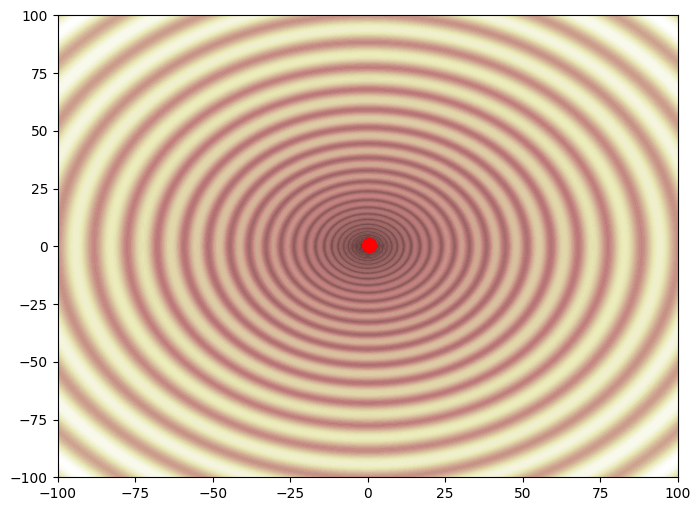

In [3]:
def f2(xy):
    xy = np.atleast_2d(xy)
    x=xy[:, 0]
    y=xy[:, 1]  
    r2=x**2 + y**2
    f=r2**0.25*(np.sin(50*r2**0.1)**2 + 1)
    return f if f.shape[0] > 1 else f[0]

pso2 = PSO(func=f2, n_particulas=100, dim=2, xmin=-100, xmax=100, max_it=200, it_tol=10)
xy2, z = pso2.actualizar()  
print("f2 -> mejor xy:", xy2, "mejor z:", z)


xy_min = -100
xy_max = 100
x = np.linspace(xy_min, xy_max, 400)
y = np.linspace(xy_min, xy_max, 400)
X, Y = np.meshgrid(x, y)
Z = f2(np.column_stack([X.ravel(), Y.ravel()])).reshape(X.shape)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.contourf(X, Y, Z, levels=50, cmap='pink')
ax.scatter(xy2[0], xy2[1], color='red', s=100, label='Óptimo PSO')

